<a href="https://colab.research.google.com/github/csabiu/astronomy/blob/main/Astro_luminosity_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install some packages and import them

In [1]:
pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 35.8 MB/s 
     |████████████████████████████████| 832 kB 67.2 MB/s 
     |████████████████████████████████| 48 kB 6.8 MB/s 
     |████████████████████████████████| 4.0 MB 68.1 MB/s 


In [2]:
!wget http://kcor.sai.msu.ru/calc_kcor.py

--2022-11-01 06:29:48--  http://kcor.sai.msu.ru/calc_kcor.py
Resolving kcor.sai.msu.ru (kcor.sai.msu.ru)... 93.180.27.83
Connecting to kcor.sai.msu.ru (kcor.sai.msu.ru)|93.180.27.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12848 (13K) [text/x-python]
Saving to: ‘calc_kcor.py’

calc_kcor.py        100%[===================>]  12.55K  --.-KB/s    in 0s      

2022-11-01 06:29:49 (281 MB/s) - ‘calc_kcor.py’ saved [12848/12848]



In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord, Distance
import astropy.coordinates as coord
from astropy import units as u
from astropy.cosmology import WMAP7
from astroquery.sdss import SDSS
import calc_kcor

# look for availabe tables and columns in
# http://skyserver.sdss.org/dr12/en/help/browser/browser.aspx 

#pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
#print(pos.ra.deg, pos.dec.deg)

query = " SELECT TOP 100000 objID, ra ,dec, z, zerr, class, \
        cModelMag_r, cModelMag_g, cModelMagErr_r, extinction_r \
        FROM  SpecPhotoAll  WHERE (class = 'GALAXY') \
        AND z>0.001 AND z<0.2 AND ra>200 AND ra<230 AND dec>10 AND dec<40"


res = SDSS.query_sql(query)


/usr/local/lib/python3.7/dist-packages/astroquery/sdss/core.py:877: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


(array([1.500e+02, 1.990e+02, 2.520e+02, 2.120e+02, 1.360e+02, 1.330e+02,
        1.120e+02, 8.300e+01, 8.800e+01, 7.400e+01, 9.900e+01, 1.060e+02,
        1.010e+02, 1.070e+02, 1.450e+02, 1.810e+02, 2.100e+02, 2.810e+02,
        3.400e+02, 4.870e+02, 5.880e+02, 6.970e+02, 9.730e+02, 1.212e+03,
        1.438e+03, 1.733e+03, 1.998e+03, 2.403e+03, 2.698e+03, 3.183e+03,
        3.389e+03, 3.509e+03, 3.580e+03, 3.374e+03, 3.305e+03, 3.052e+03,
        2.870e+03, 2.604e+03, 2.385e+03, 2.197e+03, 2.014e+03, 1.878e+03,
        1.666e+03, 1.510e+03, 1.391e+03, 1.306e+03, 1.307e+03, 1.059e+03,
        1.075e+03, 8.870e+02, 9.060e+02, 7.890e+02, 7.680e+02, 6.680e+02,
        6.210e+02, 5.690e+02, 5.370e+02, 5.210e+02, 4.570e+02, 4.540e+02,
        3.860e+02, 3.840e+02, 3.560e+02, 3.620e+02, 3.000e+02, 2.900e+02,
        2.800e+02, 2.560e+02, 2.200e+02, 2.190e+02, 2.140e+02, 1.830e+02,
        1.440e+02, 1.480e+02, 1.290e+02, 1.300e+02, 1.130e+02, 1.270e+02,
        1.080e+02, 1.060e+02, 8.200e+0

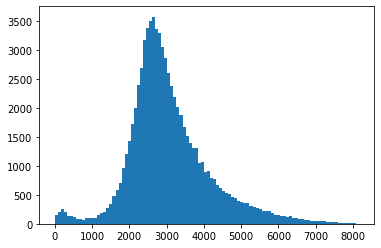

In [9]:
# compute signal to noise of r-band magnitude
snr=m_r/m_r_err
plt.hist(snr,100)

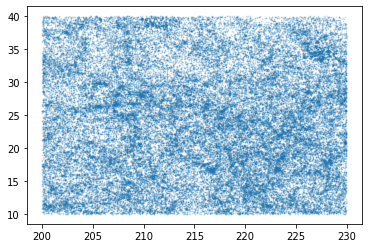

In [10]:
res=res[res['cModelMag_r']>0] # clean data a little
ra=res['ra']
dec=res['dec']
z=res['z']
m_g=res['cModelMag_g']
m_r=res['cModelMag_r']
e_r=res['extinction_r']
m_r_err=res['cModelMagErr_r']
#m_z=res['cModelMag_z']
plt.scatter(ra,dec,alpha=0.2,s=0.5)


In [11]:
#compute K-correctio
kcorr=calc_kcor.calc_kcor('r', z, 'g - r', m_g-m_r)

In [ ]:
# compute distance (in Mpc)

d=

# Absolute magnitude including extinction and K-correction
M_r=

In [ ]:
# decide on volume limited sample cuts for z=0.1
plt.scatter(z,M_r,s=0.5)
plt.ylim([-10,-27])


In [ ]:
# make histogram of galaxies as a funciton of magnitude
# plot errorbar (assume possionian)

In [ ]:
# fit a Schechter function : determine 3 free parameters
# plot best fit to data and errorbars

In [ ]:
# decide on volume limited sample cuts for z=0.05
# remake the above plot
# how does alpha, Mstar change